In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import gc
from tqdm import tqdm
import seaborn as sns
gc.collect()
style.use("ggplot")

In [2]:
futures = pd.read_csv("Archive/trb_usdt_futures_export.csv", index_col=0)
spot = pd.read_csv("Archive/trb_usdt_spot_export.csv", index_col=0)
trades = pd.read_csv("Archive/trb_usdt_trades_export.csv", index_col=0)

In [3]:
futures.index = pd.to_datetime(futures.index)
spot.index = pd.to_datetime(spot.index)
trades.index = pd.to_datetime(trades.index)

In [4]:
futures.isna().sum()

symbol       0
bid_price    0
ask_price    0
dtype: int64

In [5]:
spot.isna().sum()

symbol       0
bid_price    0
ask_price    0
dtype: int64

In [6]:
trades.isna().sum()

symbol             0
price              0
quantity           0
is_market_maker    0
dtype: int64

In [7]:
futures = futures.iloc[::-1].copy()
spot = spot.iloc[::-1].copy()
trades = trades.iloc[::-1].copy()

In [8]:
futures

,symbol,bid_price,ask_price
time,,,
2025-05-27 12:00:00.025000+00:00,TRB_USDT,43.140,43.141
2025-05-27 12:00:00.029000+00:00,TRB_USDT,43.138,43.140
2025-05-27 12:00:00.029000+00:00,TRB_USDT,43.138,43.141
2025-05-27 12:00:02.470000+00:00,TRB_USDT,43.134,43.140
2025-05-27 12:00:02.478000+00:00,TRB_USDT,43.133,43.134
...,...,...,...
2025-05-28 11:48:50.551000+00:00,TRB_USDT,50.537,50.544
2025-05-28 11:48:50.554000+00:00,TRB_USDT,50.537,50.542
2025-05-28 11:48:50.562000+00:00,TRB_USDT,50.537,50.541


In [9]:
spot

,symbol,bid_price,ask_price
time,,,
2025-05-27 12:00:00.354000+00:00,TRB_USDT,43.15,43.17
2025-05-27 12:00:00.360000+00:00,TRB_USDT,43.16,43.17
2025-05-27 12:00:00.382000+00:00,TRB_USDT,43.15,43.17
2025-05-27 12:00:00.384000+00:00,TRB_USDT,43.16,43.17
2025-05-27 12:00:00.391000+00:00,TRB_USDT,43.15,43.17
...,...,...,...
2025-05-28 11:48:50.829000+00:00,TRB_USDT,50.56,50.57
2025-05-28 11:48:51.193000+00:00,TRB_USDT,50.56,50.58
2025-05-28 11:48:51.198000+00:00,TRB_USDT,50.57,50.58


In [10]:
trades

,symbol,price,quantity,is_market_maker
time,,,,
2025-05-27 12:00:00.382000+00:00,TRB_USDT,43.16,6.750,t
2025-05-27 12:00:00.523000+00:00,TRB_USDT,43.15,7.950,t
2025-05-27 12:00:01.824000+00:00,TRB_USDT,43.17,0.199,t
2025-05-27 12:00:02.490000+00:00,TRB_USDT,43.16,1.010,t
2025-05-27 12:00:04.225000+00:00,TRB_USDT,43.15,4.678,t
...,...,...,...,...
2025-05-28 11:48:44.298000+00:00,TRB_USDT,50.57,6.750,t
2025-05-28 11:48:44.298000+00:00,TRB_USDT,50.56,6.750,t
2025-05-28 11:48:45.095000+00:00,TRB_USDT,50.54,5.600,t


In [11]:
trades["is_market_maker"].unique()

array(['t'], dtype=object)

In [12]:
combined = pd.concat(
    [
        futures[["bid_price", "ask_price"]].add_prefix('futures_'), 
        spot[["bid_price", "ask_price"]].add_prefix('spot_'),
        trades[["price", "quantity"]]
    ],
    axis=0
).sort_index()

In [13]:
combined

,futures_bid_price,futures_ask_price,spot_bid_price,spot_ask_price,price,quantity
time,,,,,,
2025-05-27 12:00:00.025000+00:00,43.140,43.141,NaN,NaN,NaN,NaN
2025-05-27 12:00:00.029000+00:00,43.138,43.140,NaN,NaN,NaN,NaN
2025-05-27 12:00:00.029000+00:00,43.138,43.141,NaN,NaN,NaN,NaN
2025-05-27 12:00:00.354000+00:00,NaN,NaN,43.15,43.17,NaN,NaN
2025-05-27 12:00:00.360000+00:00,NaN,NaN,43.16,43.17,NaN,NaN
...,...,...,...,...,...,...
2025-05-28 11:48:50.829000+00:00,NaN,NaN,50.56,50.57,NaN,NaN
2025-05-28 11:48:51.193000+00:00,NaN,NaN,50.56,50.58,NaN,NaN
2025-05-28 11:48:51.198000+00:00,NaN,NaN,50.57,50.58,NaN,NaN


In [14]:
combined.isna().sum()

futures_bid_price    1445563
futures_ask_price    1445563
spot_bid_price       5885786
spot_ask_price       5885786
price                6747417
quantity             6747417
dtype: int64

In [15]:
len(combined) - len(futures), len(combined) - len(spot), len(combined) - len(trades)

(1445563, 5885786, 6747417)

In [16]:
combined[["price", "quantity"]] = combined[["price", "quantity"]].fillna(0.)
combined

,futures_bid_price,futures_ask_price,spot_bid_price,spot_ask_price,price,quantity
time,,,,,,
2025-05-27 12:00:00.025000+00:00,43.140,43.141,NaN,NaN,0.0,0.0
2025-05-27 12:00:00.029000+00:00,43.138,43.140,NaN,NaN,0.0,0.0
2025-05-27 12:00:00.029000+00:00,43.138,43.141,NaN,NaN,0.0,0.0
2025-05-27 12:00:00.354000+00:00,NaN,NaN,43.15,43.17,0.0,0.0
2025-05-27 12:00:00.360000+00:00,NaN,NaN,43.16,43.17,0.0,0.0
...,...,...,...,...,...,...
2025-05-28 11:48:50.829000+00:00,NaN,NaN,50.56,50.57,0.0,0.0
2025-05-28 11:48:51.193000+00:00,NaN,NaN,50.56,50.58,0.0,0.0
2025-05-28 11:48:51.198000+00:00,NaN,NaN,50.57,50.58,0.0,0.0


In [17]:
combined = combined.ffill().dropna()
combined

,futures_bid_price,futures_ask_price,spot_bid_price,spot_ask_price,price,quantity
time,,,,,,
2025-05-27 12:00:00.354000+00:00,43.138,43.141,43.15,43.17,0.00,0.00
2025-05-27 12:00:00.360000+00:00,43.138,43.141,43.16,43.17,0.00,0.00
2025-05-27 12:00:00.382000+00:00,43.138,43.141,43.16,43.17,43.16,6.75
2025-05-27 12:00:00.382000+00:00,43.138,43.141,43.15,43.17,0.00,0.00
2025-05-27 12:00:00.384000+00:00,43.138,43.141,43.16,43.17,0.00,0.00
...,...,...,...,...,...,...
2025-05-28 11:48:50.829000+00:00,50.537,50.538,50.56,50.57,0.00,0.00
2025-05-28 11:48:51.193000+00:00,50.537,50.538,50.56,50.58,0.00,0.00
2025-05-28 11:48:51.198000+00:00,50.537,50.538,50.57,50.58,0.00,0.00


In [18]:
same_values = (combined == combined.shift()).all(axis=1).values

# Compare timestamps (index)
same_index = combined.index == combined.index.to_series().shift(1)

# Combine both conditions
mask_same_row = same_values & same_index

In [19]:
same_index, same_values

(array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]))

In [20]:
mask_same_row

array([False, False, False, ..., False, False, False])

In [21]:
combined.iloc[mask_same_row]

,futures_bid_price,futures_ask_price,spot_bid_price,spot_ask_price,price,quantity
time,,,,,,
2025-05-27 12:00:06.594000+00:00,43.172,43.182,43.20,43.21,0.0,0.0
2025-05-27 12:00:06.594000+00:00,43.172,43.182,43.19,43.21,0.0,0.0
2025-05-27 12:00:07.389000+00:00,43.158,43.159,43.19,43.20,0.0,0.0
2025-05-27 12:00:10.126000+00:00,43.137,43.141,43.15,43.17,0.0,0.0
2025-05-27 12:00:20.745000+00:00,43.066,43.073,43.09,43.10,0.0,0.0
...,...,...,...,...,...,...
2025-05-28 11:48:21.477000+00:00,50.479,50.490,50.50,50.51,0.0,0.0
2025-05-28 11:48:21.635000+00:00,50.494,50.495,50.51,50.53,0.0,0.0
2025-05-28 11:48:32.076000+00:00,50.518,50.527,50.53,50.54,0.0,0.0


In [22]:
combined.loc["2025-05-27 12:00:06.594000+00:00"]

,futures_bid_price,futures_ask_price,spot_bid_price,spot_ask_price,price,quantity
time,,,,,,
2025-05-27 12:00:06.594000+00:00,43.172,43.182,43.20,43.21,0.0,0.0
2025-05-27 12:00:06.594000+00:00,43.172,43.182,43.20,43.21,0.0,0.0
2025-05-27 12:00:06.594000+00:00,43.172,43.182,43.19,43.21,0.0,0.0
2025-05-27 12:00:06.594000+00:00,43.172,43.182,43.19,43.21,0.0,0.0
2025-05-27 12:00:06.594000+00:00,43.172,43.181,43.19,43.21,0.0,0.0


In [23]:
combined.iloc[~mask_same_row].loc["2025-05-27 12:00:06.594000+00:00"]

,futures_bid_price,futures_ask_price,spot_bid_price,spot_ask_price,price,quantity
time,,,,,,
2025-05-27 12:00:06.594000+00:00,43.172,43.182,43.20,43.21,0.0,0.0
2025-05-27 12:00:06.594000+00:00,43.172,43.182,43.19,43.21,0.0,0.0
2025-05-27 12:00:06.594000+00:00,43.172,43.181,43.19,43.21,0.0,0.0


In [24]:
combined = combined.iloc[~mask_same_row].copy()
combined

,futures_bid_price,futures_ask_price,spot_bid_price,spot_ask_price,price,quantity
time,,,,,,
2025-05-27 12:00:00.354000+00:00,43.138,43.141,43.15,43.17,0.00,0.00
2025-05-27 12:00:00.360000+00:00,43.138,43.141,43.16,43.17,0.00,0.00
2025-05-27 12:00:00.382000+00:00,43.138,43.141,43.16,43.17,43.16,6.75
2025-05-27 12:00:00.382000+00:00,43.138,43.141,43.15,43.17,0.00,0.00
2025-05-27 12:00:00.384000+00:00,43.138,43.141,43.16,43.17,0.00,0.00
...,...,...,...,...,...,...
2025-05-28 11:48:50.829000+00:00,50.537,50.538,50.56,50.57,0.00,0.00
2025-05-28 11:48:51.193000+00:00,50.537,50.538,50.56,50.58,0.00,0.00
2025-05-28 11:48:51.198000+00:00,50.537,50.538,50.57,50.58,0.00,0.00


In [25]:
combined["futures_mid_price"] = (combined["futures_bid_price"] + combined["futures_ask_price"])/2
combined["spot_mid_price"] = (combined["spot_bid_price"] + combined["spot_ask_price"])/2

In [ ]:
def compute_movement_score(prices: pd.Series, timestamps: pd.Series,
                           decay_ms=5, base_change=0.0007, base_time_ms=3):
    
    
    # Ensure datetime and convert to ms
    t_ms = pd.to_datetime(timestamps).astype('int64') / 1_000_000  # convert ns → ms
    x = prices.to_numpy()
    n = len(x)
    
    scores = np.zeros(n)

    base_scale = base_change / base_time_ms  # percent change per ms → score 1

    for i in tqdm(range(n)):
        ti = t_ms[i]
        xi = x[i]
        max_score = 0
        sign = 1

        if ti - t_ms[0] < decay_ms:
            scores[i] = np.nan
            continue

        j = i - 1
        while j >= 0 and (ti - t_ms[j]) <= decay_ms:
            dt = ti - t_ms[j]
            if dt == 0:
                dt = 1 # Treat it as 1ms difference to avoid inf
    
            
            price_diff = x[i] - x[j]
            pct_change = price_diff / x[j]  # relative change
            score = pct_change / (dt * base_scale)  # how big the change is vs expected
            
            max_score = max(max_score, abs(score))
            if max_score == abs(score):
                sign = np.sign(score)
            j -= 1
        
        scores[i] = min(10, max_score)*sign #cap at 10 ~~ %0.25 change within 1ms

    return pd.Series(scores, index=prices.index)

def compute_label(prices: pd.Series, timestamps: pd.Series, look_ahead=5):

    # Ensure datetime and convert to ms
    t_ms = pd.to_datetime(timestamps).astype('int64') / 1_000_000  # convert ns → ms
    x = prices.to_numpy()
    n = len(x)
    
    labels = np.zeros(n)
    for i in tqdm(range(n)):
        ti = t_ms[i]
        xi = x[i]
        max_score = 0
        sign = 1

        if n - i < look_ahead:
            labels[i] = np.nan
            continue

        j = i + 1
        while j < n and (t_ms[j] - t_ms[i]) <= look_ahead:
            dt = ti - t_ms[j]
           
            price_diff = x[j] - x[i]
            pct_change = price_diff / x[i]  # relative change
            
            max_score = max(max_score, abs(pct_change))
            if max_score == abs(pct_change):
                sign = np.sign(pct_change)
           
            j += 1
        
        labels[i] = max_score*sign

    return pd.Series(labels, index=prices.index)

### Signal Building

In [27]:
combined["futures_movement_score"] = compute_movement_score(combined["futures_mid_price"], timestamps=combined.index, decay_ms=10)
combined["spot_movement_score"] = compute_movement_score(combined["spot_mid_price"], timestamps=combined.index, decay_ms=10)

100%|██████████| 7016355/7016355 [02:24<00:00, 48668.20it/s]


In [28]:
combined["futures_label"] = compute_label(combined["futures_mid_price"], timestamps=combined.index, look_ahead=5)
combined["spot_label"] = compute_label(combined["spot_mid_price"], timestamps=combined.index, look_ahead=5)

100%|██████████| 7016355/7016355 [01:55<00:00, 60762.91it/s] 


In [29]:
combined

,futures_bid_price,futures_ask_price,spot_bid_price,spot_ask_price,price,quantity,futures_mid_price,spot_mid_price,futures_movement_score,spot_movement_score,futures_label,spot_label
time,,,,,,,,,,,,
2025-05-27 12:00:00.354000+00:00,43.138,43.141,43.15,43.17,0.00,0.00,43.1395,43.160,NaN,NaN,0.0,0.000000
2025-05-27 12:00:00.360000+00:00,43.138,43.141,43.16,43.17,0.00,0.00,43.1395,43.165,NaN,NaN,0.0,0.000000
2025-05-27 12:00:00.382000+00:00,43.138,43.141,43.16,43.17,43.16,6.75,43.1395,43.165,0.0,0.000000,0.0,-0.000116
2025-05-27 12:00:00.382000+00:00,43.138,43.141,43.15,43.17,0.00,0.00,43.1395,43.160,0.0,-0.496434,0.0,0.000116
2025-05-27 12:00:00.384000+00:00,43.138,43.141,43.16,43.17,0.00,0.00,43.1395,43.165,0.0,0.248276,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-28 11:48:50.829000+00:00,50.537,50.538,50.56,50.57,0.00,0.00,50.5375,50.565,0.0,0.211912,0.0,0.000000
2025-05-28 11:48:51.193000+00:00,50.537,50.538,50.56,50.58,0.00,0.00,50.5375,50.570,0.0,0.000000,NaN,NaN
2025-05-28 11:48:51.198000+00:00,50.537,50.538,50.57,50.58,0.00,0.00,50.5375,50.575,0.0,0.084744,NaN,NaN


In [30]:
combined["futures_bid_ask_spread"] = (combined["futures_ask_price"] - combined["futures_bid_price"])/combined["futures_mid_price"]
combined["spot_bid_ask_spread"] = (combined["spot_ask_price"] - combined["spot_bid_price"])/combined["spot_mid_price"]
combined["futures_spot_spread"] = (combined["spot_mid_price"] - combined["futures_mid_price"])/combined["futures_mid_price"]
combined

,futures_bid_price,futures_ask_price,spot_bid_price,spot_ask_price,price,quantity,futures_mid_price,spot_mid_price,futures_movement_score,spot_movement_score,futures_label,spot_label,futures_bid_ask_spread,spot_bid_ask_spread,futures_spot_spread
time,,,,,,,,,,,,,,,
2025-05-27 12:00:00.354000+00:00,43.138,43.141,43.15,43.17,0.00,0.00,43.1395,43.160,NaN,NaN,0.0,0.000000,0.00007,0.000463,0.000475
2025-05-27 12:00:00.360000+00:00,43.138,43.141,43.16,43.17,0.00,0.00,43.1395,43.165,NaN,NaN,0.0,0.000000,0.00007,0.000232,0.000591
2025-05-27 12:00:00.382000+00:00,43.138,43.141,43.16,43.17,43.16,6.75,43.1395,43.165,0.0,0.000000,0.0,-0.000116,0.00007,0.000232,0.000591
2025-05-27 12:00:00.382000+00:00,43.138,43.141,43.15,43.17,0.00,0.00,43.1395,43.160,0.0,-0.496434,0.0,0.000116,0.00007,0.000463,0.000475
2025-05-27 12:00:00.384000+00:00,43.138,43.141,43.16,43.17,0.00,0.00,43.1395,43.165,0.0,0.248276,0.0,0.000000,0.00007,0.000232,0.000591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-28 11:48:50.829000+00:00,50.537,50.538,50.56,50.57,0.00,0.00,50.5375,50.565,0.0,0.211912,0.0,0.000000,0.00002,0.000198,0.000544
2025-05-28 11:48:51.193000+00:00,50.537,50.538,50.56,50.58,0.00,0.00,50.5375,50.570,0.0,0.000000,NaN,NaN,0.00002,0.000395,0.000643
2025-05-28 11:48:51.198000+00:00,50.537,50.538,50.57,50.58,0.00,0.00,50.5375,50.575,0.0,0.084744,NaN,NaN,0.00002,0.000198,0.000742


In [ ]:
def ms_windowed_features(prices: pd.Series, timestamps: pd.Series, ms_window=20, decay_lambda=0.2):

    # Ensure datetime and convert to ms
    t_ms = pd.to_datetime(timestamps).astype('int64') / 1_000_000  # convert ns → ms
    x = prices.to_numpy()
    n = len(x)
    
    twma = np.zeros(n)
    twroc = np.zeros(n)
    rolling_min = np.zeros(n)
    rolling_max = np.zeros(n)
    
    t0 = t_ms[0]
    for i in tqdm(range(n)):
        ti = t_ms[i]
        xi = x[i]

        if ti - t0 < ms_window:
            twma[i] = np.nan
            twroc[i] = np.nan
            rolling_min[i] = np.nan
            rolling_max[i] = np.nan

            continue
        
        max_val = xi
        min_val = xi

        vals = [xi]
        time_weights = [0]


        j = i - 1
        while j >= 0 and (ti - t_ms[j]) <= ms_window:
            
            dt = ti - t_ms[j]
            if dt == 0:
                j -= 1
                continue  # skip exact same timestamp
            
            max_val = max(max_val, x[j])
            min_val = min(min_val, x[j])

            vals.append(x[j])
            time_weights.append(dt)
         
            j -= 1
            
        rolling_min[i] = min_val
        rolling_max[i] = max_val

        weights = np.exp(-np.array(time_weights)*decay_lambda)
        ma = np.sum(np.array(vals)*weights)/np.sum(weights)
        
        roc = ((xi - vals[-1])/vals[-1])*weights[-1]

        twma[i] = ma
        twroc[i] = roc

    return pd.concat((
        pd.Series(twma, index=timestamps),
        pd.Series(twroc, index=timestamps),
        pd.Series(rolling_max, index=timestamps),
        pd.Series(rolling_min, index=timestamps)
    ), axis=1)

def trade_features(prices:pd.Series, quantities:pd.Series, timestamps: pd.Series, ms_window=100):

    # Ensure datetime and convert to ms
    t_ms = pd.to_datetime(timestamps).astype('int64') / 1_000_000  # convert ns → ms
    x = prices.to_numpy()
    q = quantities.to_numpy()
    n = len(x)
    
    volume = np.zeros(n)
    time_since_last_trade = np.zeros(n)
    last_trade_qty = np.zeros(n)
    last_trade_price = np.zeros(n)
    total_trade_qty = np.zeros(n)
    trade_freq = np.zeros(n)
    
    t0 = t_ms[0]
    trade_t0 = 0.
    last_trade_ind = 0
    for i in tqdm(range(n)):
        ti = t_ms[i]

        if ti - t0 < ms_window:
            volume[i] = np.nan
            time_since_last_trade[i] = np.nan
            last_trade_qty[i] = np.nan
            last_trade_price[i] = np.nan
            total_trade_qty[i] = np.nan
            trade_freq[i] = np.nan

            continue
   
        vals = []
        trade_qtys = []
        freq = 0

        if q[i] > 0:
            vals.append(x[i])
            trade_qtys.append(q[i])
            freq += 1

            if ti > trade_t0:
                trade_t0 = ti
                last_trade_ind = i

        # Look back until within decay_ms window
        j = i - 1
        while j >= 0 and (ti - t_ms[j]) <= ms_window:
            
            if q[j] > 0:
                vals.append(x[j])
                trade_qtys.append(q[j])
                freq += 1

                if t_ms[j] > trade_t0: #this is to handle trades from first 100ms in the dataset which was skipped
                    trade_t0 = t_ms[j]
                    last_trade_ind = j
         
            j -= 1

        time_since_last_trade[i] = ti - trade_t0
        last_trade_qty[i] = q[last_trade_ind]
        last_trade_price[i] = x[last_trade_ind]
        trade_freq[i] = freq
        
        if len(vals) == 0:
            volume[i] = 0.
            total_trade_qty[i] = 0.
            
        else:
            volume[i] = np.sum(np.array(vals)*np.array(trade_qtys))
            total_trade_qty[i] = np.sum(np.array(trade_qtys))
        

    return pd.concat((
        pd.Series(volume, index=timestamps),
        pd.Series(time_since_last_trade, index=timestamps),
        pd.Series(last_trade_qty, index=timestamps),
        pd.Series(last_trade_price, index=timestamps),
        pd.Series(total_trade_qty, index=timestamps),
        pd.Series(trade_freq, index=timestamps)
    ), axis=1)

In [32]:
combined[[
    "futures_twma_20ms",
    "futures_twroc_20ms",
    "futures_rolling_max_20ms",
    "futures_rolling_min_20ms"
]] = ms_windowed_features(combined["futures_mid_price"], timestamps=combined.index, ms_window=20, decay_lambda=0.2)

combined[[
    "spot_twma_20ms",
    "spot_twroc_20ms",
    "spot_rolling_max_20ms",
    "spot_rolling_min_20ms"
]] = ms_windowed_features(combined["spot_mid_price"], timestamps=combined.index, ms_window=20, decay_lambda=0.2)

100%|██████████| 7016355/7016355 [04:13<00:00, 27683.56it/s]


In [33]:
gc.collect()

9

In [34]:
combined[[
    "100ms_volume",
    "time_since_last_trade",
    "last_trade_qty",
    "last_trade_price",
    "total_trade_qty",
    "num_trades_in_100ms"
]] = trade_features(prices=combined["price"], quantities=combined["quantity"], timestamps=combined.index, ms_window=100)

100%|██████████| 7016355/7016355 [04:40<00:00, 25047.56it/s]


In [35]:
gc.collect()

9

In [36]:
combined

,futures_bid_price,futures_ask_price,spot_bid_price,spot_ask_price,price,quantity,futures_mid_price,spot_mid_price,futures_movement_score,spot_movement_score,...,spot_twma_20ms,spot_twroc_20ms,spot_rolling_max_20ms,spot_rolling_min_20ms,100ms_volume,time_since_last_trade,last_trade_qty,last_trade_price,total_trade_qty,num_trades_in_100ms
time,,,,,,,,,,,,,,,,,,,,,
2025-05-27 12:00:00.354000+00:00,43.138,43.141,43.15,43.17,0.00,0.00,43.1395,43.160,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-27 12:00:00.360000+00:00,43.138,43.141,43.16,43.17,0.00,0.00,43.1395,43.165,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-27 12:00:00.382000+00:00,43.138,43.141,43.16,43.17,43.16,6.75,43.1395,43.165,0.0,0.000000,...,43.165000,0.000000,43.165,43.165,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-27 12:00:00.382000+00:00,43.138,43.141,43.15,43.17,0.00,0.00,43.1395,43.160,0.0,-0.496434,...,43.160000,0.000000,43.160,43.160,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-27 12:00:00.384000+00:00,43.138,43.141,43.16,43.17,0.00,0.00,43.1395,43.165,0.0,0.248276,...,43.163568,0.000000,43.165,43.160,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-28 11:48:50.829000+00:00,50.537,50.538,50.56,50.57,0.00,0.00,50.5375,50.565,0.0,0.211912,...,50.562993,0.000066,50.565,50.560,0.0,2452.000000,0.2,50.56,0.0,0.0
2025-05-28 11:48:51.193000+00:00,50.537,50.538,50.56,50.58,0.00,0.00,50.5375,50.570,0.0,0.000000,...,50.570000,0.000000,50.570,50.570,0.0,2816.000000,0.2,50.56,0.0,0.0
2025-05-28 11:48:51.198000+00:00,50.537,50.538,50.57,50.58,0.00,0.00,50.5375,50.575,0.0,0.084744,...,50.573655,0.000036,50.575,50.570,0.0,2821.000244,0.2,50.56,0.0,0.0


In [37]:
gc.collect()

0

In [38]:
combined = combined.dropna().copy()
combined

,futures_bid_price,futures_ask_price,spot_bid_price,spot_ask_price,price,quantity,futures_mid_price,spot_mid_price,futures_movement_score,spot_movement_score,...,spot_twma_20ms,spot_twroc_20ms,spot_rolling_max_20ms,spot_rolling_min_20ms,100ms_volume,time_since_last_trade,last_trade_qty,last_trade_price,total_trade_qty,num_trades_in_100ms
time,,,,,,,,,,,,,,,,,,,,,
2025-05-27 12:00:00.457000+00:00,43.138,43.141,43.15,43.17,0.00,0.00,43.1395,43.160,0.000000,0.000000,...,43.160000,0.000000,43.160,43.160,291.3300,74.999756,6.75,43.16,6.75,1.0
2025-05-27 12:00:00.459000+00:00,43.138,43.141,43.16,43.17,0.00,0.00,43.1395,43.165,0.000000,0.248246,...,43.162993,0.000078,43.165,43.160,291.3300,76.999756,6.75,43.16,6.75,1.0
2025-05-27 12:00:00.465000+00:00,43.138,43.141,43.15,43.17,0.00,0.00,43.1395,43.160,0.000000,-0.082739,...,43.161002,0.000000,43.165,43.160,291.3300,82.999756,6.75,43.16,6.75,1.0
2025-05-27 12:00:00.468000+00:00,43.138,43.141,43.15,43.16,0.00,0.00,43.1395,43.155,0.000000,-0.165497,...,43.157713,-0.000013,43.165,43.155,291.3300,85.999756,6.75,43.16,6.75,1.0
2025-05-27 12:00:00.523000+00:00,43.138,43.141,43.15,43.16,43.15,7.95,43.1395,43.155,0.000000,0.000000,...,43.155000,0.000000,43.155,43.155,343.0425,0.000000,7.95,43.15,7.95,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-28 11:48:50.562000+00:00,50.537,50.541,50.55,50.56,0.00,0.00,50.5390,50.555,-0.005300,0.000000,...,50.555458,-0.000005,50.560,50.555,0.0000,2184.999756,0.20,50.56,0.00,0.0
2025-05-28 11:48:50.571000+00:00,50.537,50.540,50.55,50.56,0.00,0.00,50.5385,50.555,-0.004711,0.000000,...,50.555000,0.000000,50.555,50.555,0.0000,2194.000000,0.20,50.56,0.00,0.0
2025-05-28 11:48:50.593000+00:00,50.537,50.538,50.55,50.56,0.00,0.00,50.5375,50.555,0.000000,0.000000,...,50.555000,0.000000,50.555,50.555,0.0000,2216.000000,0.20,50.56,0.00,0.0


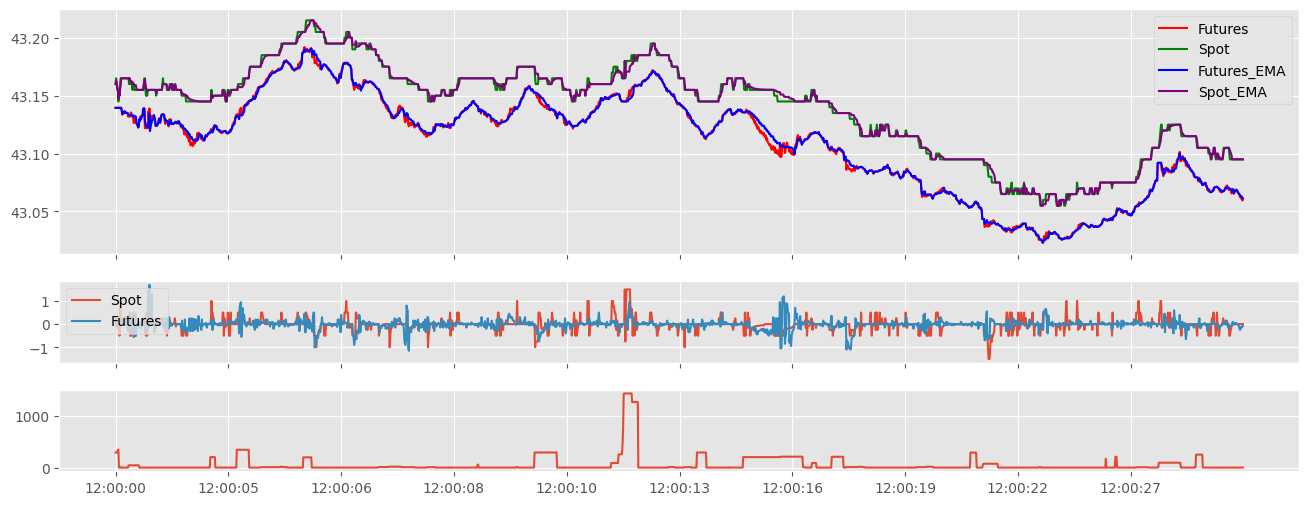

In [39]:
fig, axes = plt.subplots(3, 1, sharex="all", figsize = (16,6), gridspec_kw={'height_ratios': [6, 2, 2]})
axes, ax1, ax2 = axes
axes.plot(combined["futures_mid_price"].values[:2000], color="red", label="Futures")
axes.plot(combined["spot_mid_price"].values[:2000], color="green", label="Spot")
axes.plot(combined["futures_twma_20ms"].values[:2000], color="blue", label="Futures_EMA")
axes.plot(combined["spot_twma_20ms"].values[:2000], color="purple", label="Spot_EMA")

axes.legend(loc="best")
axes.set_xticks(np.arange(0, 2000, 200), pd.Series(combined.index[:2000:200]).apply(lambda x: x.strftime('%H:%M:%S')), size="x-small")

ax1.plot(combined["spot_movement_score"].values[:2000], label="Spot")
ax1.plot(combined["futures_movement_score"].values[:2000], label="Futures")
ax1.legend(loc="best")

ax2.plot(combined["100ms_volume"].values[:2000])
plt.show()

In [40]:
combined["futures_ema_spread"] = combined["futures_mid_price"] - combined["futures_twma_20ms"]
combined["futures_distance_to_max"] = combined["futures_rolling_max_20ms"] - combined["futures_mid_price"]
combined["futures_distance_to_min"] = combined["futures_mid_price"] - combined["futures_rolling_min_20ms"]
combined["futures_bandwidth"] = combined["futures_rolling_max_20ms"] - combined["futures_rolling_min_20ms"]

In [41]:
combined["spot_ema_spread"] = combined["spot_mid_price"] - combined["spot_twma_20ms"]
combined["spot_distance_to_max"] = combined["spot_rolling_max_20ms"] - combined["spot_mid_price"]
combined["spot_distance_to_min"] = combined["spot_mid_price"] - combined["spot_rolling_min_20ms"]
combined["spot_bandwidth"] = combined["spot_rolling_max_20ms"] - combined["spot_rolling_min_20ms"]

In [42]:
combined["futures_trade_price_diff"] = combined["futures_mid_price"] - combined["last_trade_price"]
combined["spot_trade_price_diff"] = combined["spot_mid_price"] - combined["last_trade_price"]

In [43]:
FUTURES_FEATURE_SET = [
    "futures_movement_score",
    "futures_bid_ask_spread",
    "futures_twroc_20ms",
    "futures_ema_spread",
    "futures_distance_to_max",
    "futures_distance_to_min",
    "futures_bandwidth",
    "futures_trade_price_diff"
]

SPOT_FEATURE_SET = [
    "spot_movement_score",
    "spot_bid_ask_spread",
    "spot_twroc_20ms",
    "spot_ema_spread",
    "spot_distance_to_max",
    "spot_distance_to_min",
    "spot_bandwidth",
    "spot_trade_price_diff"
]

MUTUAL_FEATURE_SET = [
    "futures_spot_spread",
    "100ms_volume",
    "time_since_last_trade",
    "last_trade_qty",
    "total_trade_qty",
    "num_trades_in_100ms"
]

In [44]:
import seaborn as sns

In [45]:
train_ind = int(len(combined)*0.8)
val_ind = int(len(combined)*0.9)

tr_df = combined.iloc[:train_ind].copy()
val_df = combined.iloc[train_ind:val_ind].copy()
test_df = combined.iloc[val_ind:].copy()

In [46]:
tr_df[FUTURES_FEATURE_SET + SPOT_FEATURE_SET + MUTUAL_FEATURE_SET + ["futures_label", "spot_label"]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
futures_movement_score,5613073.0,1.872526e-03,0.843181,-10.000000,-0.074295,0.000000,0.080027,10.000000
futures_bid_ask_spread,5613073.0,2.165368e-04,0.000440,0.000018,0.000075,0.000155,0.000256,0.051486
futures_twroc_20ms,5613073.0,-1.029639e-08,0.000047,-0.002873,-0.000005,0.000000,0.000005,0.003133
futures_ema_spread,5613073.0,1.293494e-05,0.011822,-1.016632,-0.000785,0.000000,0.000803,1.278858
futures_distance_to_max,5613073.0,6.498101e-03,0.027493,0.000000,0.000000,0.000500,0.005000,1.932500
futures_distance_to_min,5613073.0,6.560695e-03,0.026274,0.000000,0.000000,0.000500,0.005000,2.083500
futures_bandwidth,5613073.0,1.305880e-02,0.044640,0.000000,0.001000,0.004500,0.011000,2.083500
futures_trade_price_diff,5613073.0,-2.106573e-02,0.025370,-1.153500,-0.032500,-0.021500,-0.010000,1.645000
spot_movement_score,5613073.0,8.016490e-03,0.693350,-10.000000,0.000000,0.000000,0.000000,10.000000
spot_bid_ask_spread,5613073.0,3.550131e-04,0.000301,0.000176,0.000194,0.000225,0.000401,0.027219


In [47]:
scales = {
    k: tr_df[k].std()
    for k in ["100ms_volume", "time_since_last_trade", "last_trade_qty", "total_trade_qty", "num_trades_in_100ms"]
}

scales

{'100ms_volume': 4395.935901791674,
 'time_since_last_trade': 750.3273551760348,
 'last_trade_qty': 6.686418992646154,
 'total_trade_qty': 89.60438788303532,
 'num_trades_in_100ms': 16.993584634629546}

In [48]:
for k,v in scales.items():
    combined[k] = combined[k]/v

In [49]:
gc.collect()

0

In [50]:
train_ind = int(len(combined)*0.8)
val_ind = int(len(combined)*0.9)

tr_df = combined.iloc[:train_ind].copy()
val_df = combined.iloc[train_ind:val_ind].copy()
test_df = combined.iloc[val_ind:].copy()

In [51]:
tr_df[FUTURES_FEATURE_SET + SPOT_FEATURE_SET + MUTUAL_FEATURE_SET + ["futures_label", "spot_label"]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
futures_movement_score,5613073.0,1.872526e-03,0.843181,-10.000000,-0.074295,0.000000,0.080027,10.000000
futures_bid_ask_spread,5613073.0,2.165368e-04,0.000440,0.000018,0.000075,0.000155,0.000256,0.051486
futures_twroc_20ms,5613073.0,-1.029639e-08,0.000047,-0.002873,-0.000005,0.000000,0.000005,0.003133
futures_ema_spread,5613073.0,1.293494e-05,0.011822,-1.016632,-0.000785,0.000000,0.000803,1.278858
futures_distance_to_max,5613073.0,6.498101e-03,0.027493,0.000000,0.000000,0.000500,0.005000,1.932500
futures_distance_to_min,5613073.0,6.560695e-03,0.026274,0.000000,0.000000,0.000500,0.005000,2.083500
futures_bandwidth,5613073.0,1.305880e-02,0.044640,0.000000,0.001000,0.004500,0.011000,2.083500
futures_trade_price_diff,5613073.0,-2.106573e-02,0.025370,-1.153500,-0.032500,-0.021500,-0.010000,1.645000
spot_movement_score,5613073.0,8.016490e-03,0.693350,-10.000000,0.000000,0.000000,0.000000,10.000000
spot_bid_ask_spread,5613073.0,3.550131e-04,0.000301,0.000176,0.000194,0.000225,0.000401,0.027219


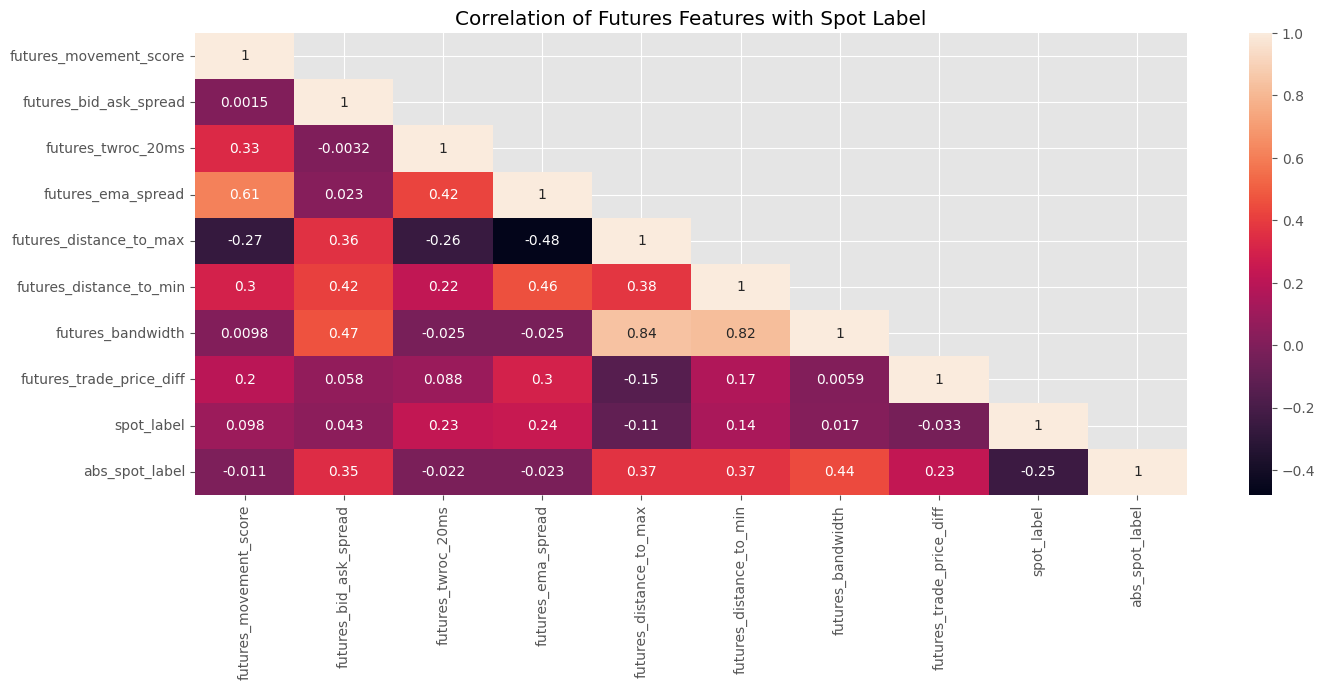

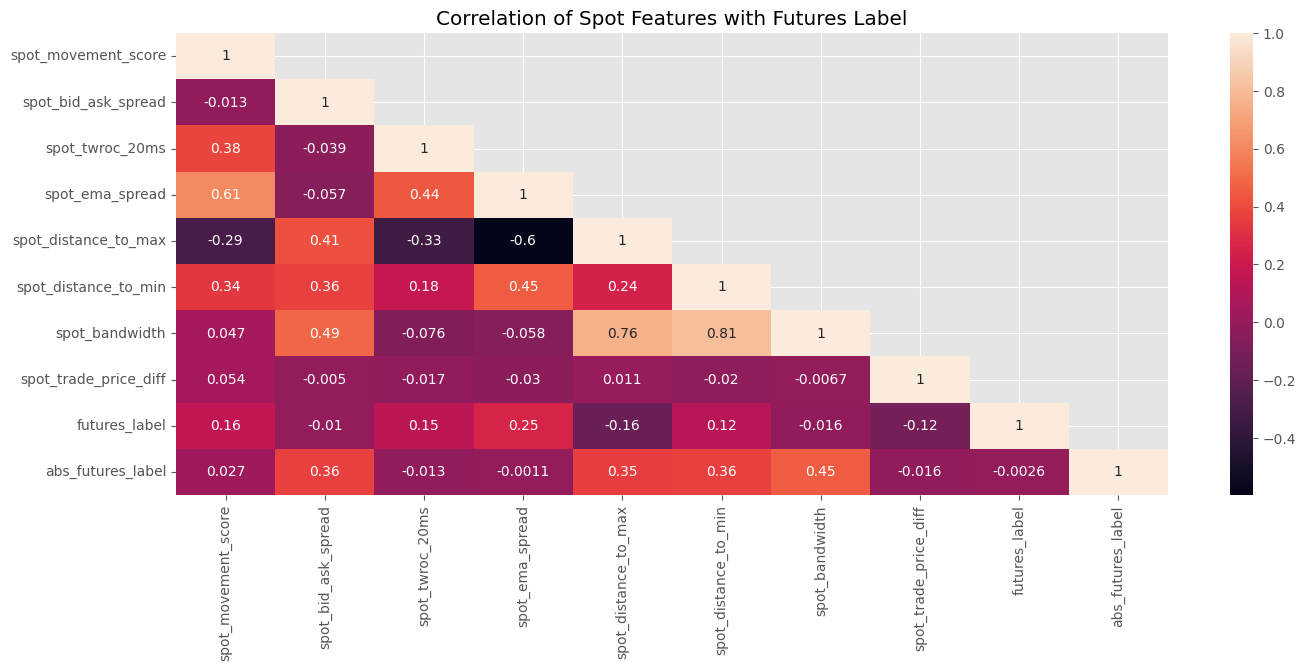

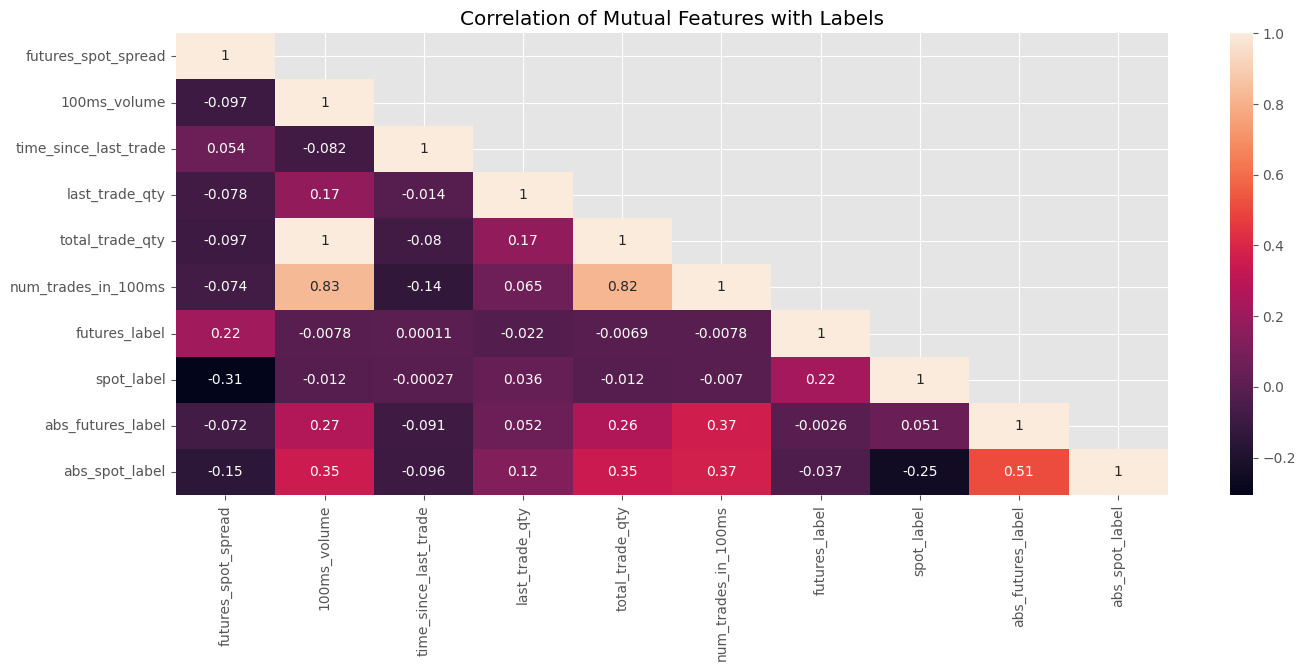

In [52]:
cr_df = tr_df[FUTURES_FEATURE_SET + ["spot_label"]].copy()
cr_df["abs_spot_label"] = cr_df["spot_label"].abs()
cr_df = cr_df.corr()

plt.figure(figsize=(16,6))
sns.heatmap(cr_df, annot=True, mask=np.triu(cr_df, k=1))
plt.title("Correlation of Futures Features with Spot Label")
plt.show()
plt.close()

cr_df = tr_df[SPOT_FEATURE_SET + ["futures_label"]].copy()
cr_df["abs_futures_label"] = cr_df["futures_label"].abs()
cr_df = cr_df.corr()

plt.figure(figsize=(16,6))
sns.heatmap(cr_df, annot=True, mask=np.triu(cr_df, k=1))
plt.title("Correlation of Spot Features with Futures Label")
plt.show()
plt.close()

cr_df = tr_df[MUTUAL_FEATURE_SET + ["futures_label", "spot_label"]].copy()
cr_df["abs_futures_label"] = cr_df["futures_label"].abs()
cr_df["abs_spot_label"] = cr_df["spot_label"].abs()
cr_df = cr_df.corr()

plt.figure(figsize=(16,6))
sns.heatmap(cr_df, annot=True, mask=np.triu(cr_df, k=1))
plt.title("Correlation of Mutual Features with Labels")
plt.show()
plt.close()

### Training

#### Spot

In [53]:
spot_label = tr_df[abs(tr_df["futures_movement_score"]) >= 1]["spot_label"].values
spot_features = tr_df[abs(tr_df["futures_movement_score"]) >= 1][FUTURES_FEATURE_SET + SPOT_FEATURE_SET + MUTUAL_FEATURE_SET].values

In [54]:
from lightgbm import LGBMRegressor

In [55]:
spot_lgbm = LGBMRegressor(
    num_leaves=120, max_depth=7,
    reg_alpha=0.3,
    reg_lambda=0.1,
    random_state=42,
    subsample=0.9, 
    subsample_freq=5,
    verbose=-1)
spot_lgbm.fit(spot_features, spot_label)

LGBMRegressor(max_depth=7, num_leaves=120, random_state=42, reg_alpha=0.3,
              reg_lambda=0.1, subsample=0.9, subsample_freq=5, verbose=-1)

In [56]:
y_pred = spot_lgbm.predict(spot_features)

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [58]:
mean_squared_error(spot_label, y_pred)**1/2, mean_absolute_error(spot_label, y_pred), r2_score(spot_label, y_pred)

(2.3862170361443123e-07, 0.000434672361626421, 0.7156896934689463)

In [59]:
val_spot_label = val_df[abs(val_df["futures_movement_score"]) >= 1]["spot_label"].values
val_spot_features = val_df[abs(val_df["futures_movement_score"]) >= 1][FUTURES_FEATURE_SET + SPOT_FEATURE_SET + MUTUAL_FEATURE_SET].values

In [60]:
val_preds = spot_lgbm.predict(val_spot_features)

In [61]:
mean_squared_error(val_spot_label, val_preds)**1/2, mean_absolute_error(val_spot_label, val_preds), r2_score(val_spot_label, val_preds)

(3.3937212147258426e-07, 0.000546085455272151, 0.5933910174238264)

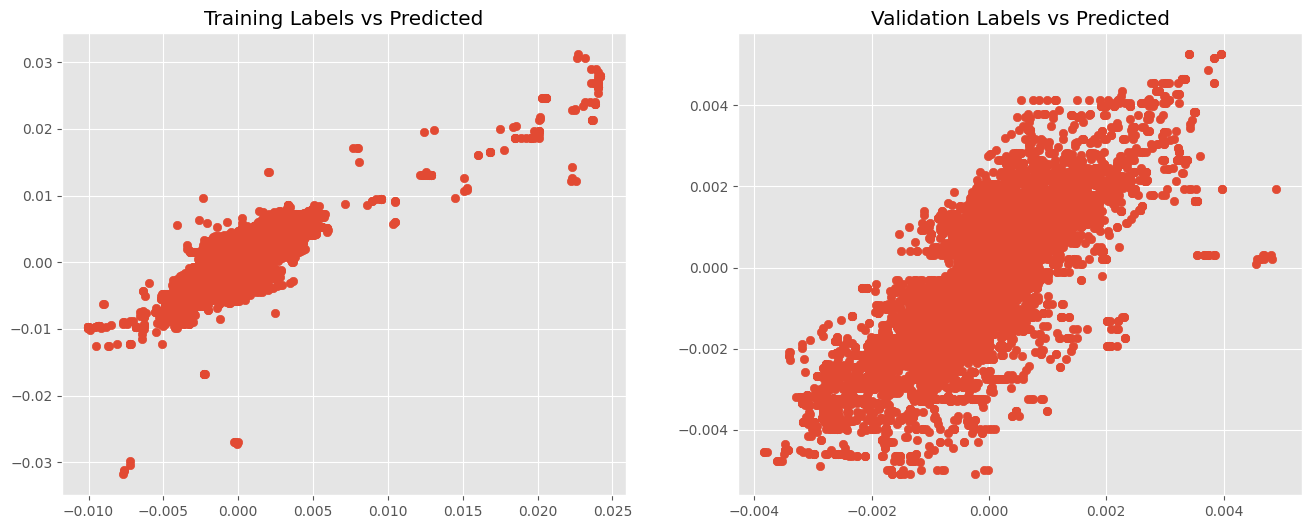

In [62]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize = (16,6), sharey=False)
ax1, ax2 = axes

ax1.scatter(y_pred, spot_label)
ax1.set_title("Training Labels vs Predicted")

ax2.scatter(val_preds, val_spot_label)
ax2.set_title("Validation Labels vs Predicted")
plt.show()

#### Futures

In [63]:
futures_label = tr_df[abs(tr_df["spot_movement_score"]) >= 1]["futures_label"].values
futures_features = tr_df[abs(tr_df["spot_movement_score"]) >= 1][FUTURES_FEATURE_SET + SPOT_FEATURE_SET + MUTUAL_FEATURE_SET].values

In [64]:
futures_lgbm = LGBMRegressor(
    num_leaves=120, max_depth=7,
    reg_alpha=0.3,
    reg_lambda=0.1,
    random_state=42,
    subsample=0.9,
    subsample_freq=5,
    verbose=-1)
futures_lgbm.fit(futures_features, futures_label)

LGBMRegressor(max_depth=7, num_leaves=120, random_state=42, reg_alpha=0.3,
              reg_lambda=0.1, subsample=0.9, subsample_freq=5, verbose=-1)

In [65]:
y_pred = futures_lgbm.predict(futures_features)

In [66]:
mean_squared_error(futures_label, y_pred)**1/2, mean_absolute_error(futures_label, y_pred), r2_score(futures_label, y_pred)

(4.1333518229708756e-07, 0.0005090309223668419, 0.7642041126722299)

In [67]:
val_futures_label = val_df[abs(val_df["spot_movement_score"]) >= 1]["futures_label"].values
val_futures_features = val_df[abs(val_df["spot_movement_score"]) >= 1][FUTURES_FEATURE_SET + SPOT_FEATURE_SET + MUTUAL_FEATURE_SET].values

In [68]:
val_preds = futures_lgbm.predict(val_futures_features)

In [69]:
mean_squared_error(val_futures_label, val_preds)**1/2, mean_absolute_error(val_futures_label, val_preds), r2_score(val_futures_label, val_preds)

(6.33135160634902e-07, 0.0006190041022509118, 0.44233484987949134)

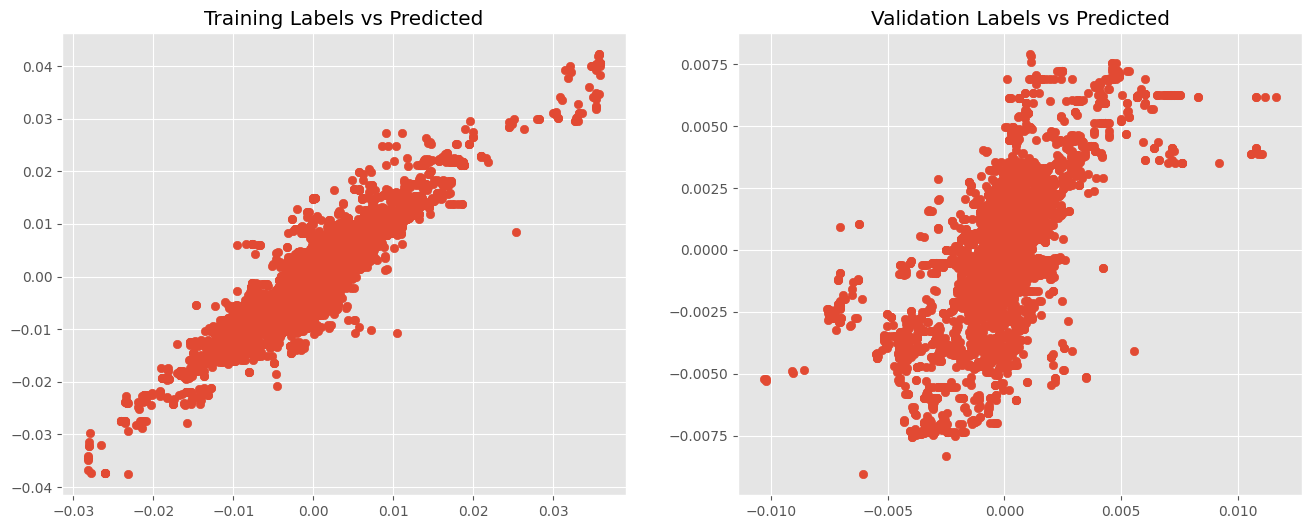

In [70]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize = (16,6), sharey=False)
ax1, ax2 = axes

ax1.scatter(y_pred, futures_label)
ax1.set_title("Training Labels vs Predicted")

ax2.scatter(val_preds, val_futures_label)
ax2.set_title("Validation Labels vs Predicted")
plt.show()

#### Test Performance

In [71]:
test_spot_label = test_df[abs(test_df["futures_movement_score"]) >= 1]["spot_label"].values
test_spot_features = test_df[abs(test_df["futures_movement_score"]) >= 1][FUTURES_FEATURE_SET + SPOT_FEATURE_SET + MUTUAL_FEATURE_SET].values

test_futures_label = test_df[abs(test_df["spot_movement_score"]) >= 1]["futures_label"].values
test_futures_features = test_df[abs(test_df["spot_movement_score"]) >= 1][FUTURES_FEATURE_SET + SPOT_FEATURE_SET + MUTUAL_FEATURE_SET].values

In [72]:
spot_test_preds = spot_lgbm.predict(test_spot_features)
futures_test_preds = futures_lgbm.predict(test_futures_features)

In [73]:
mean_squared_error(test_spot_label, spot_test_preds)**1/2, mean_absolute_error(test_spot_label, spot_test_preds), r2_score(test_spot_label, spot_test_preds)

(1.6071445030162707e-07, 0.0003897654044802988, 0.7025330206753155)

In [74]:
mean_squared_error(test_futures_label, futures_test_preds)**1/2, mean_absolute_error(test_futures_label, futures_test_preds), r2_score(test_futures_label, futures_test_preds)

(2.6048164385866694e-07, 0.00038694222774508455, 0.1800317046100426)

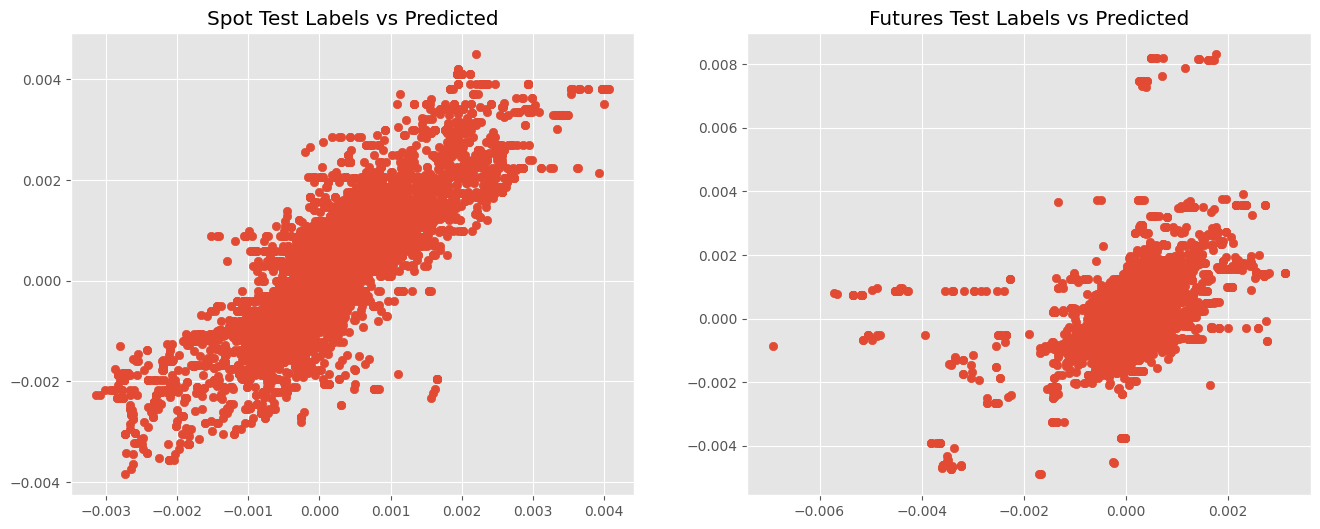

In [75]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize = (16,6), sharey=False)
ax1, ax2 = axes

ax1.scatter(spot_test_preds, test_spot_label)
ax1.set_title("Spot Test Labels vs Predicted")

ax2.scatter(futures_test_preds, test_futures_label)
ax2.set_title("Futures Test Labels vs Predicted")
plt.show()

## Secondary Objectives

### Leading Market

In [76]:
combined

,futures_bid_price,futures_ask_price,spot_bid_price,spot_ask_price,price,quantity,futures_mid_price,spot_mid_price,futures_movement_score,spot_movement_score,...,futures_ema_spread,futures_distance_to_max,futures_distance_to_min,futures_bandwidth,spot_ema_spread,spot_distance_to_max,spot_distance_to_min,spot_bandwidth,futures_trade_price_diff,spot_trade_price_diff
time,,,,,,,,,,,,,,,,,,,,,
2025-05-27 12:00:00.457000+00:00,43.138,43.141,43.15,43.17,0.00,0.00,43.1395,43.160,0.000000,0.000000,...,0.000000e+00,0.000,0.0,0.000,0.000000e+00,0.000,0.000,0.000,-0.0205,0.000
2025-05-27 12:00:00.459000+00:00,43.138,43.141,43.16,43.17,0.00,0.00,43.1395,43.165,0.000000,0.248246,...,-7.105427e-15,0.000,0.0,0.000,2.006562e-03,0.000,0.005,0.005,-0.0205,0.005
2025-05-27 12:00:00.465000+00:00,43.138,43.141,43.15,43.17,0.00,0.00,43.1395,43.160,0.000000,-0.082739,...,0.000000e+00,0.000,0.0,0.000,-1.001916e-03,0.005,0.000,0.005,-0.0205,0.000
2025-05-27 12:00:00.468000+00:00,43.138,43.141,43.15,43.16,0.00,0.00,43.1395,43.155,0.000000,-0.165497,...,-7.105427e-15,0.000,0.0,0.000,-2.713039e-03,0.010,0.000,0.010,-0.0205,-0.005
2025-05-27 12:00:00.523000+00:00,43.138,43.141,43.15,43.16,43.15,7.95,43.1395,43.155,0.000000,0.000000,...,0.000000e+00,0.000,0.0,0.000,0.000000e+00,0.000,0.000,0.000,-0.0105,0.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-28 11:48:50.562000+00:00,50.537,50.541,50.55,50.56,0.00,0.00,50.5390,50.555,-0.005300,0.000000,...,-1.187386e-03,0.008,0.0,0.008,-4.581486e-04,0.005,0.000,0.005,-0.0210,-0.005
2025-05-28 11:48:50.571000+00:00,50.537,50.540,50.55,50.56,0.00,0.00,50.5385,50.555,-0.004711,0.000000,...,-1.655980e-04,0.002,0.0,0.002,7.105427e-15,0.000,0.000,0.000,-0.0215,-0.005
2025-05-28 11:48:50.593000+00:00,50.537,50.538,50.55,50.56,0.00,0.00,50.5375,50.555,0.000000,0.000000,...,0.000000e+00,0.000,0.0,0.000,0.000000e+00,0.000,0.000,0.000,-0.0225,-0.005


In [77]:
gc.collect()

15

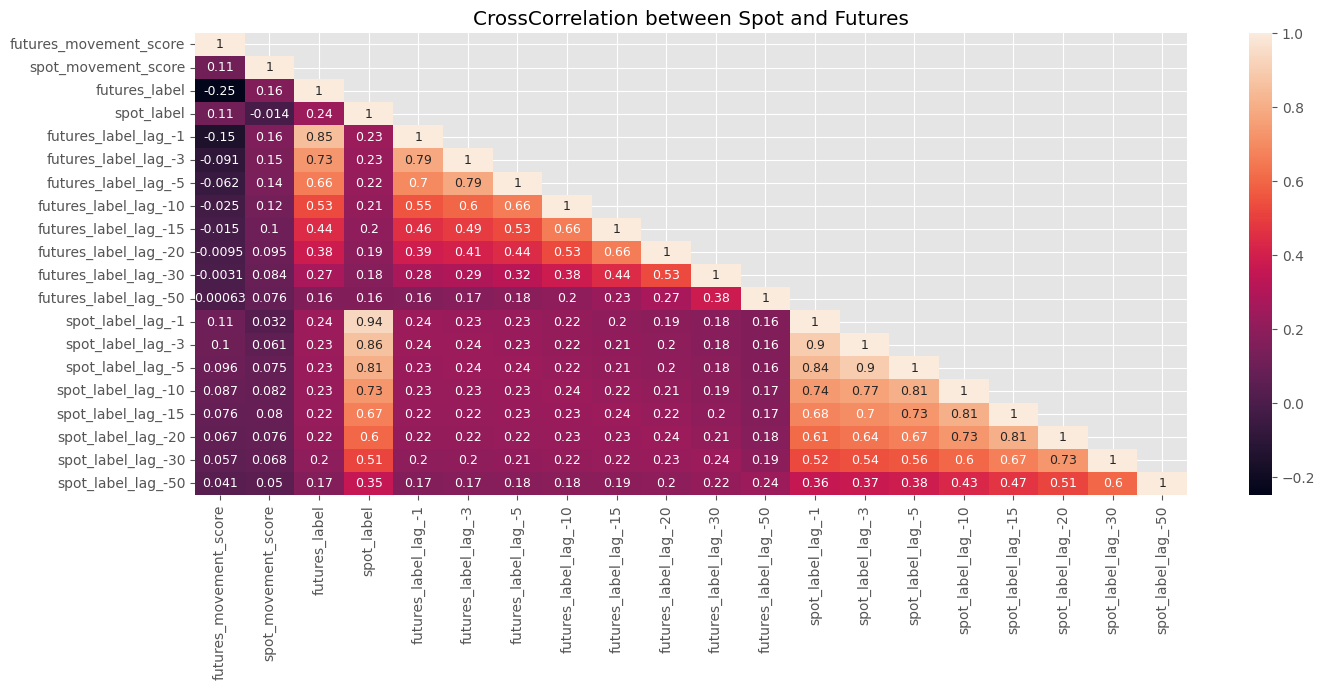

In [78]:
col_set = ["futures_movement_score", "spot_movement_score", "futures_label", "spot_label"]

cr_df = combined[col_set].copy()

for x in ["futures_label", "spot_label"]:
    for lag in [1, 3, 5, 10, 15, 20, 30, 50]:
        cr_df[f"{x}_lag_-{lag}"] = cr_df[x].shift(-lag) 

cr_df = cr_df.corr()

plt.figure(figsize=(16,6))
sns.heatmap(cr_df, annot=True, mask=np.triu(cr_df, k=1), annot_kws={"fontsize": 9})
plt.title("CrossCorrelation between Spot and Futures")
plt.show()
plt.close()

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
spot_linreg = LinearRegression()

futures_features = combined[FUTURES_FEATURE_SET].values
spot_label = combined["spot_label"].values

spot_linreg.fit(futures_features, spot_label)


futures_linreg = LinearRegression()

spot_features = combined[SPOT_FEATURE_SET].values
futures_label = combined["futures_label"].values

futures_linreg.fit(spot_features, futures_label)

LinearRegression()

In [81]:
spot_linreg.score(futures_features, spot_label), futures_linreg.score(spot_features, futures_label)

(0.10286120381492347, 0.0796707166122872)

### Noise Categorization

In [102]:
def precision(labels, preds, threshold=0.0005):
    tp = len(np.where((abs(labels) >= threshold) & (abs(preds) >= threshold))[0])
    fp = len(np.where((abs(labels) < threshold) & (abs(preds) >= threshold))[0])

    return tp/(tp+fp)

In [ ]:
precision(test_spot_label, spot_test_preds), precision(test_futures_label, futures_test_preds)

(0.8349431208413822, 0.7238683127572016)

### Momentum Persistence

In [ ]:
def persistence_score(prices: pd.Series, timestamps: pd.Series, movement_scores:pd.Series, 
                      max_look_ahead_ms=1000*60, min_look_ahead_ms=1):

    t_ms = pd.to_datetime(timestamps).astype('int64') / 1_000_000  # convert ns → ms
    x = prices.to_numpy()
    sig = movement_scores.to_numpy()
    n = len(x)

    persistence = np.zeros(n)

    for i in tqdm(range(1, n)):
        si = sig[i]

        if abs(si) < 1:
            continue

        xi = x[i-1] #set level as the price before the move
        ti = t_ms[i]

        j = i + 1

        p = 0.
        while j < n and (t_ms[j] - ti) <= max_look_ahead_ms:

            if (t_ms[j] - ti) < min_look_ahead_ms:
                j += 1
                continue

            xj = x[j]

            p = t_ms[j] - ti
            

            if si < 0 and xj >= xi*1.0001:
                break

            elif si > 0 and xj <= xi*(1-0.0001):
                break
            
            j += 1

        persistence[i] = p

    return pd.Series(persistence, index=timestamps)